**Team** **1**: **Anastasiia Petrovych, Taras Yaroshko, Yurii Zinchuk**

In [ ]:
%%capture
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

%env IMAGES_PERMALINK=https://raw.githubusercontent.com/andylvua/la_lab1_data/main/images
!wget -nc $IMAGES_PERMALINK/img1.jpg -P ./images
!wget -nc $IMAGES_PERMALINK/img2.jpg -P ./images

## Intro

1. Submit this task as a link to your team's Google Colab (https://colab.research.google.com/notebooks/intro.ipynb#). Make sure you made a copy of this notebook and opened it via UCU email address.

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.   

4. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

5. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **recizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!




## PART 1

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

The shape of the image is (500, 500, 3)


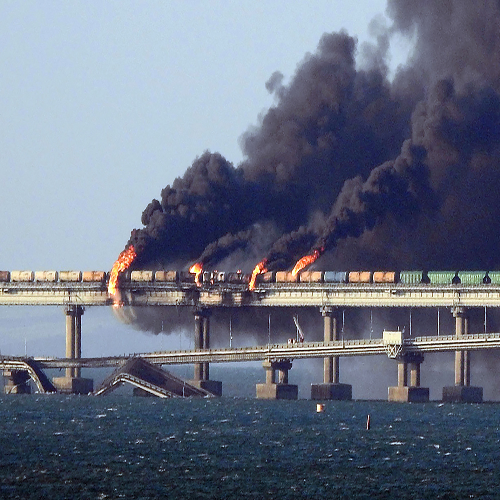

In [ ]:
img1_path = './images/img1.jpg'
image = cv.imread(img1_path)
resized = cv.resize(image, (500,500))

image_height, image_width = resized.shape[:2]
center = (image_width // 2, image_height // 2)

print(f"The shape of the image is {resized.shape}")
cv2_imshow(resized)

 What is this image's shape? What do the values mean?


*The image's shape consist of 3 parameters : rows' number , columns' number and channels' number.*


Channels are  the number of values that represents our pixels. As the built-in function imread has 3 modes of image representing:

*   **IMREAD_GRAYSCALE(grayscale) -> 0**
*  **IMREAD_COLOR(RGB, 3 channels) -> -1**
*   **IMREAD_UNCHANGED(including appha channel) -> 1**

PNG image has 4 channels: red, green, blue and aplha(transparency).
The default parameter is -1 and any trasnparency isn't read.





### 1.2 Rotation matrix


Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
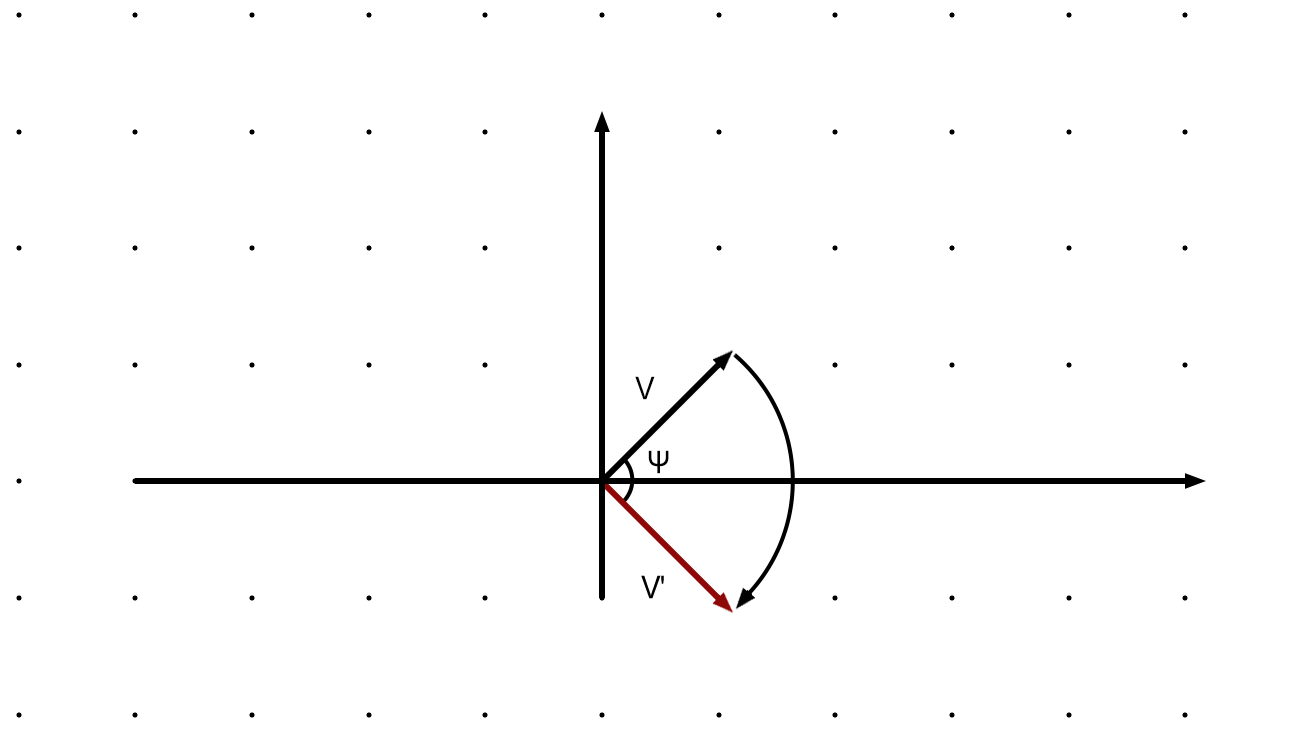

What is the transformation matrix that corresponds to rotation by a generic angle $\phi$?

Assume $r$ is the length of vector $V$ and its coordinates are $\begin{bmatrix} x\\ 
y
\end{bmatrix}$
. Let's also define $\theta$ as the angle between vector $V$ and the $x$-axis. Therefore, $cos (\theta) = \dfrac{x}{r} \implies x = rcos(\theta)$ and $y = rsin(\theta)$. When we rotate the vector by an angle $\phi$, we get a new vector $V'$ with coordinates $\begin{bmatrix} x'\\ 
y'
\end{bmatrix}$. From this we can conclude that $x' = rcos(\phi \pm \theta)$ and $y' = rcos(\phi \pm \theta)$ (sign depends on whether we rotate our vector clockwise or counter clockwise).

Suppose we rotate counter clockwise $\implies x' = rcos(\phi + \theta) = r(cos(\theta)cos(\phi) - sin(\theta)sin(\phi)) = \underline{rcos(\theta)}cos(\phi) - \underline{rsin(\theta)}sin(\phi) = xcos(\phi) - ysin(\phi)$.

Identically, $y' = sin(\phi + \theta) = r(sin(\theta)cos(\phi) + cos(\theta)sin(\phi)) = \underline{rsin(\theta)}cos(\phi) - \underline{rcos(\theta)}sin(\phi) = ycos(\phi) + xsin(\phi)$.

Here, $$x'= xcos(\phi) - ysin(\phi) \\
y' = ycos(\phi) + xsin(\phi)$$

We can represent such system of equations in matrix form:
$$\begin{bmatrix} x'\\
 y'\end{bmatrix} = 
\begin{bmatrix} \cos(\phi) \quad -sin(\phi) \\ sin(\phi) \quad cos(\phi)\end{bmatrix}
\begin{bmatrix} x \\ y\end{bmatrix}$$So, the rotation matrix is:
$$\begin{bmatrix} \cos(\phi) \quad -sin(\phi) \\ sin(\phi) \quad cos(\phi)\end{bmatrix}$$


Your next task is to implement a function that calculates the rotation matrix and apply it to a vector and to an image to rotate them by $45^\circ$.
First, construct the rotation matrix:

In [ ]:
def get_rotation_matrix(phi):
  phi = np.radians(phi)
  cos_phi = np.cos(phi)
  sin_phi = np.sin(phi)
  
  transformation_matrix = np.float32(
      [
          [cos_phi, -sin_phi],
          [sin_phi,  cos_phi]
      ]
  )
  return transformation_matrix

phi = 45
M = get_rotation_matrix(phi)

print(f"Rotation matrix is\n{M}")

Rotation matrix is
[[ 0.70710677 -0.70710677]
 [ 0.70710677  0.70710677]]


Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


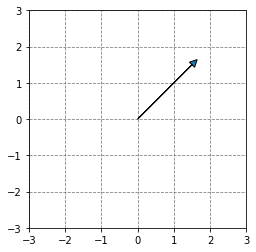

In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

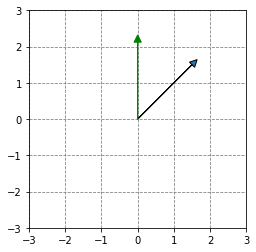

In [ ]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])
B2 = M.dot(B1 - A) + A

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! Check how below:

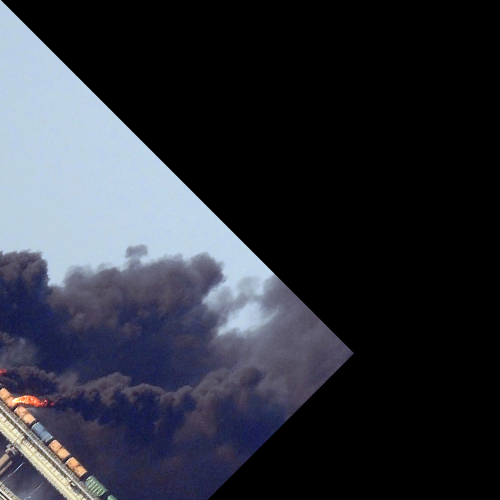

In [ ]:
rotated = cv.warpAffine(resized, np.hstack((M, np.float32([[0], [0]]))),(500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(rotated)

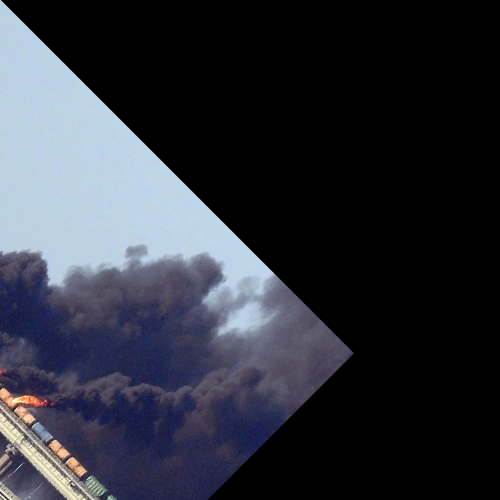

In [ ]:
rotation_matrix = cv.getRotationMatrix2D((0, 0), -45, 1.0)
rotated_cv = cv.warpAffine(resized, rotation_matrix, (500, 500), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(rotated_cv)

### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
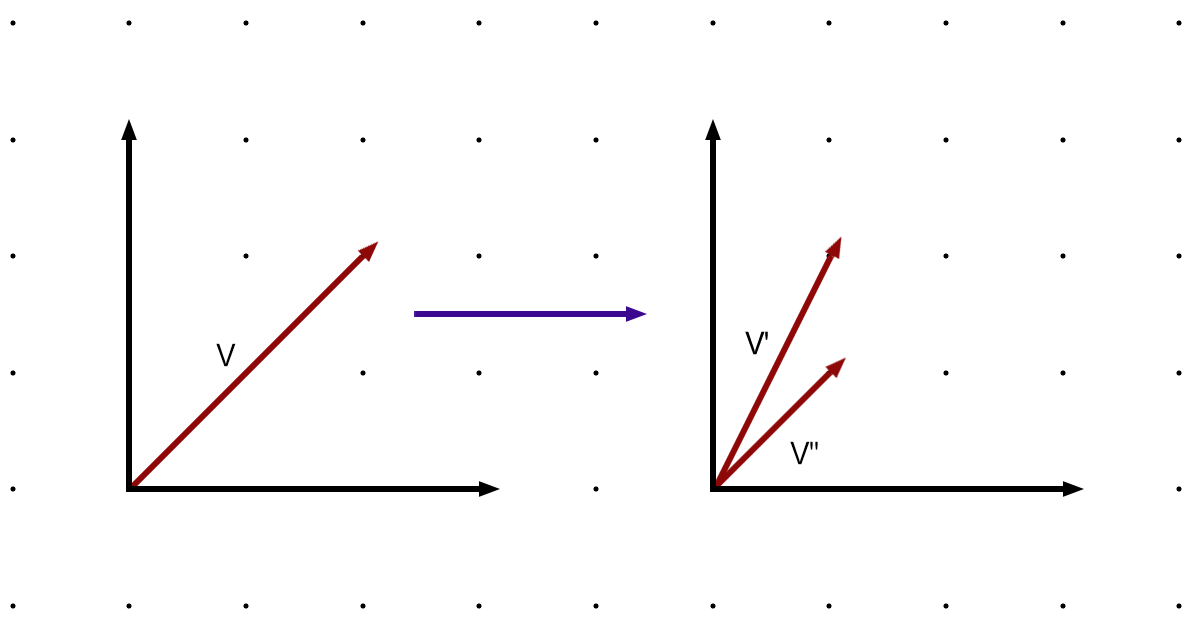

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector and the image. First, explain how you derive the scaling matrix:

*By vector properties, scaling is the linear transformation which enlarges or shrink matrix by some factor*

As we can see  from  scalar multiplication: 

\begin{equation}
\left( \begin{array}{ccc}
S_x & 0\\
0 & S_y\end{array} \right)×
 \left( \begin{array}{ccc}
x\\
y\\
\end{array} \right)=\left(\begin{array}{ccc}
x_1\\
y_1\\
\end{array} \right)
\end{equation}

\begin{equation}
\text{where}  
\left(\begin{array}{ccc}
x_1, 
y_1
\end{array}\right) \text{is 
transormed vector and}\left( \begin{array}{ccc}
S_x & 0\\
0 & S_y\end{array} \right)\text{ is a scaling matrix}.
\end{equation}

In [ ]:
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.float32(
      [
          [scale_factor_x, 0],
          [0, scale_factor_y]
      ]
  )

factor_x, factor_y = (1, 0.5)
M2 = get_scaling_matrix(factor_x, factor_y)

print(f"Scaling matrix is\n{M2}")

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

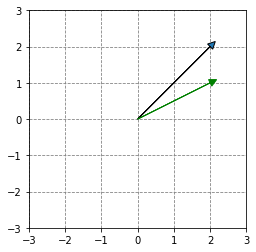

In [ ]:
A = np.array([0,0])
B1 = np.array([2, 2])
B2 = M2.dot(B1 - A)

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Now, apply scaling by the same factor to the image:

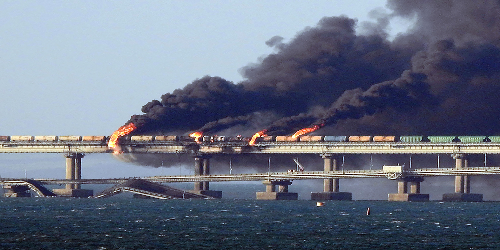

In [ ]:
scaled = cv.warpAffine(resized, np.hstack((M2, np.float32([[0], [0]]))), np.int16(M2.dot(resized.shape[:2])),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(scaled)

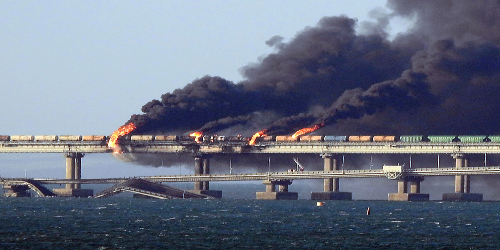

In [ ]:
builtin_scaled = cv.resize(resized, (0, 0), fx=1, fy=0.5)

cv2_imshow(builtin_scaled)

*As we can see, the buil-in fuction gives the same result as with usage of the generated matrix*

### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you needs to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector and the image. First, explain how do you build a matrix that corresponds to a shearing transformation:

Deriving this matrix is actually very simple. Observe that we have to move each point by the distance proportional to the $y$-coordinate of the point. Therefore, $x' = x+sy, \, y' = y$. Let's represent this in matrix form:
$$\begin{bmatrix} x'\\
 y'\end{bmatrix} = \begin{bmatrix} x + sy\\
 y\end{bmatrix} = 
\begin{bmatrix} 1 \quad s \\ 0 \quad 1\end{bmatrix}
\begin{bmatrix} x\\
 y\end{bmatrix}$$
where $s$ is the shearing factor. Therefore, the shear matrix is as follows:
$$\begin{bmatrix} 1 \quad s \\ 0 \quad 1\end{bmatrix}$$

Second, implement a function for constructing such a matrix:

In [ ]:
def get_horizontal_shear_matrix(factor):
  return np.float32(
      [
          [1, factor],
          [0, 1]
      ]
  )

M3 = get_horizontal_shear_matrix(1.5)
print(f"Shearing matrix is\n{M3}")

Shearing matrix is
[[1.  1.5]
 [0.  1. ]]


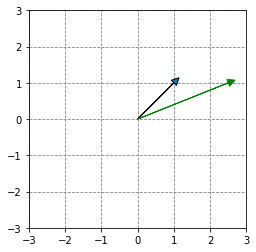

In [ ]:
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = M3.dot(B1 - A) + A

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image. 

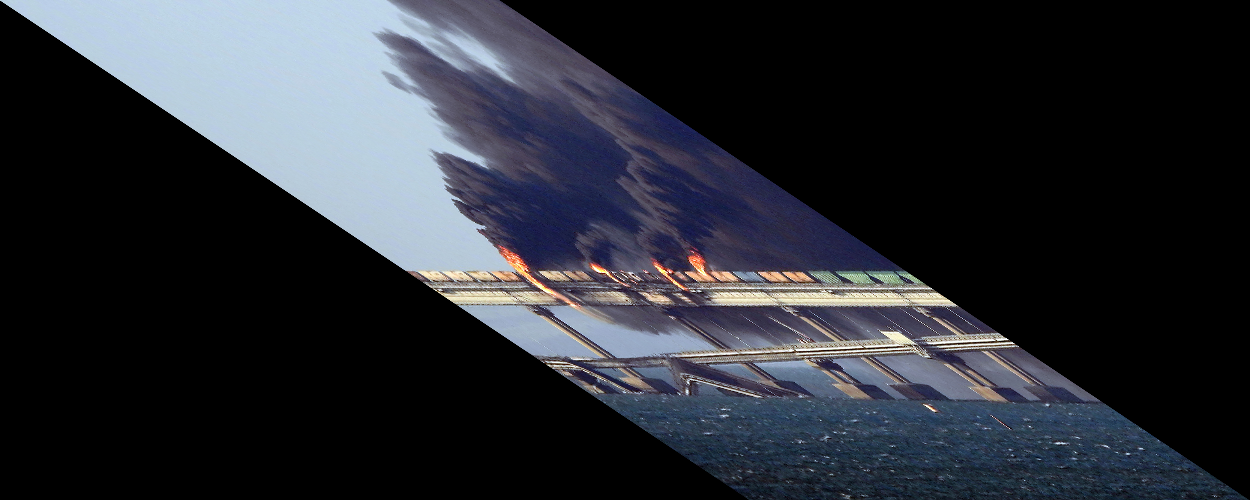

In [ ]:
sheared = cv.warpAffine(resized, np.hstack((M3, np.float32([[0], [0]]))), np.int16(M3.dot(resized.shape[:2])),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(sheared)

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


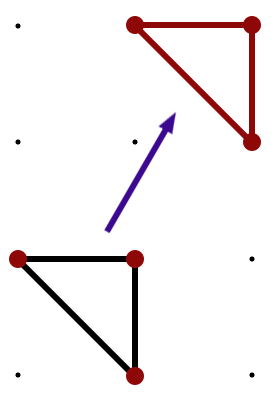

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector and to the image. Start from explaining how to construct a translation matrix:

As we move our point of a figure by a fixed distance, we can construct such translation equation in 2D:

$$x' = x + t_x \\
y' = y + t_y$$
where $t_x$ and $t_y$ are the corresponding distances by which we are applying translation. To show this in matrix form:
$$\begin{bmatrix} x'\\
 y'\end{bmatrix} = \begin{bmatrix} x\\
 y\end{bmatrix} + \begin{bmatrix} t_x\\
 t_y\end{bmatrix}$$But, to correctly represent this as matrix multiplication, we have to take $2\times 1$ resulting vector $\, \begin{bmatrix} x' \\
 y'\end{bmatrix}$ and then find the matrix $A$ such that $$\begin{bmatrix} x' \\
 y' \end{bmatrix} = \begin{bmatrix} x + t_x \\
 y + t_y\end{bmatrix} = A\begin{bmatrix} x\\
 y \\ 1 \end{bmatrix}$$ will give us the desired vector. Note: we need to take $3 \times 1$ vector $\begin{bmatrix} x\\
 y \\ 1 \end{bmatrix}$ in order to correctly implement the multiplication of matrix by vector.


The size of this matrix has to be $2 \times 3$.  Such matrix is \begin{bmatrix} 1 \quad 0 \quad t_x\\
 0 \quad 1 \quad t_y\end{bmatrix}


Then, implement a function that produces such a matrix:

In [ ]:
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return np.float32(
      [
          [1, 0, translation_factor_x],
          [0, 1, translation_factor_y],
          [1, 0, 1]
      ]
  )

M4 = get_translation_matrix(20, 25)

print(f"Translation matrix is\n{M4}")

Translation matrix is
[[ 1.  0. 20.]
 [ 0.  1. 25.]
 [ 1.  0.  1.]]


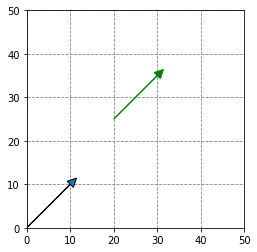

In [ ]:
A1 = np.array([0, 0])
B1 = np.array([10, 10])
A2 = M4.dot(np.hstack((A1, [1])))[:2]
B2 = M4.dot(np.hstack((B1, [1])))[:2]

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation by $(20, 25)$ to the image.

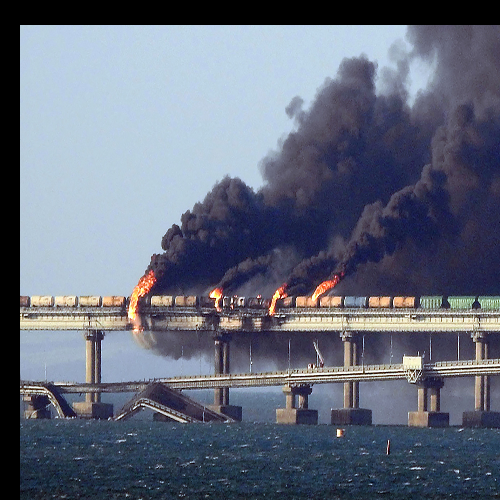

In [ ]:
translated = cv.warpAffine(resized, M4[:-1, :], (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(translated)

### 1.6 Mirror symmetry 
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

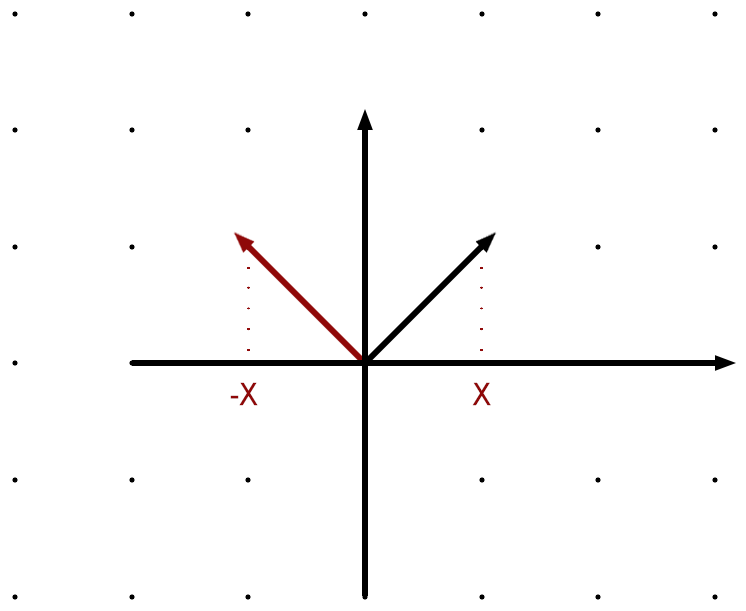

As in the previous parts, you need to provide the expanation, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.

*To find mirror symetry we need myltiply our vector by some matrix which produces a vertical symmetry matrix.Observed from column multiplication it can be easily derives vertical symmetry matrix:*

\begin{equation}
\left( \begin{array}{ccc}
-1 & 0\\
0&1\end{array} \right)×
 \left( \begin{array}{ccc}
x\\
y\\
\end{array} \right)=\left(\begin{array}{ccc}
-x\\
y\\
\end{array} \right)
\end{equation}



In [ ]:
def get_horizontal_mirror_marix():
  return np.float32(
      [
          [-1, 0],
          [0, 1]
      ]
  )

M5 = get_horizontal_mirror_marix()
print(f"Mirroring matrix is\n{M5}")

Mirroring matrix is
[[-1.  0.]
 [ 0.  1.]]


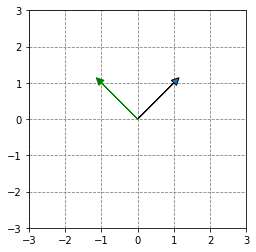

In [ ]:
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = M5.dot(B1)

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

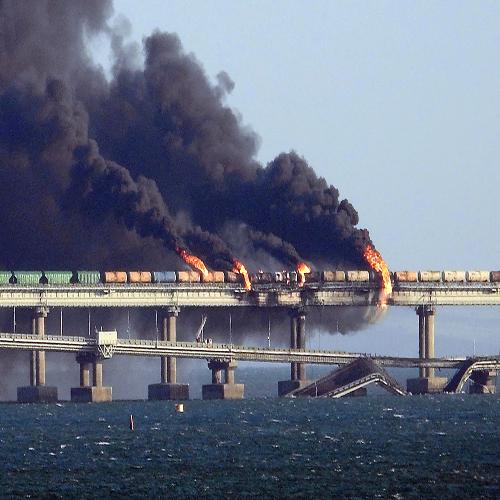

In [ ]:
mirrored = cv.warpAffine(resized, np.hstack((M5, np.float32([[499], [0]]))), (500, 500), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(mirrored)

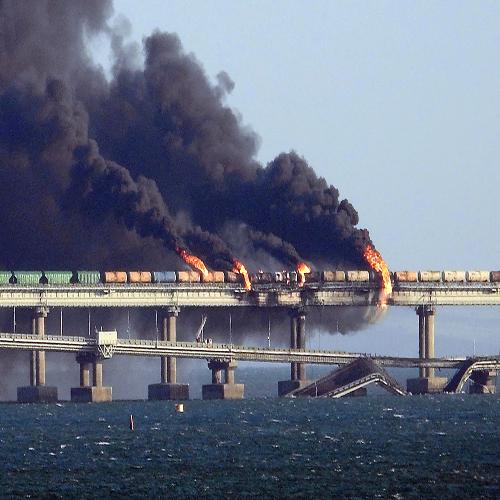

In [ ]:
builtin_mirrored = cv.flip(resized, 1)

cv2_imshow(builtin_mirrored)

*As we can observe, our matrix make our picture the same as with the help of built-in fuction*

## PART 2

### 2.1 Perspective shift matrix

You will need to use img2.jpg for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

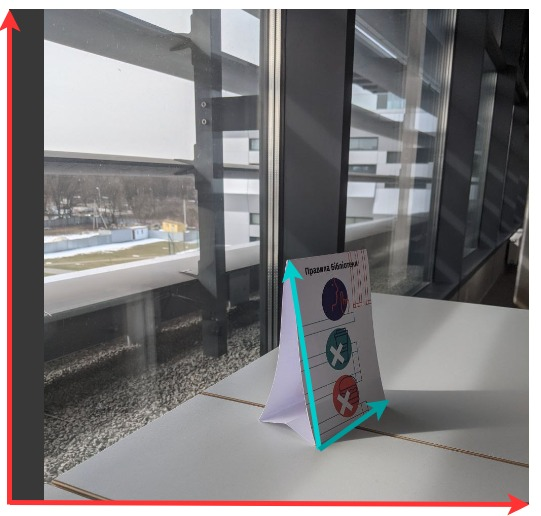

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image (3 of these points should not be collinear).In this case, the transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

In other words, we want to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible. 
(Hint: $c_{22} = 1$)

First, start from explaining how the system was constructed.

To solve the system, we first need to take a look at what we have as the inputs\
There are coordinates of 4 points on the initial image and corresponding coordinates of those points on the resulting image. Also there are 9 coefficients $c_{ij}$, where $i,j = 0,...,2$. Knowing that $c_{22} = 1$, we have 8 variables we need to find.\
As one can observe, each of the 4 point gives 2 equations (on $u$ and on $v$). So we have 8 varibles and 8 equations. This means we can solve it.\
The corresponding linear system is constructed as follows.\
We have:
$$
u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{c_{20}*x_i + c_{21}*y_i + c_{22}}\\
v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}\\
\big\Downarrow
$$
$$
c_{00}*x_i + c_{01}*y_i + c_{02} = u_i*(c_{20}*x_i + c_{21}*y_i + 1)\\
c_{10}*x_i + c_{11}*y_i + c_{12} = v_i*(c_{20}*x_i + c_{21}*y_i + 1)\\
\big\Downarrow
$$
$$
u_i = c_{00}*x_i + c_{01}*y_i + c_{02} - u_i*c_{20}*x_i - u_i*c_{21}*y_i\\
v_i = c_{10}*x_i + c_{11}*y_i + c_{12} - v_i*c_{20}*x_i - v_i*c_{21}*y_i\\
$$
Now we can apply the above for $i = 1,...,4$ to get the following linear system of equations.\
$$
u_1 = c_{00}*x_1 + c_{01}*y_1 + c_{02} - u_1*c_{20}*x_1 - u_1*c_{21}*y_1\\
u_2 = c_{00}*x_2 + c_{01}*y_2 + c_{02} - u_2*c_{20}*x_2 - u_2*c_{21}*y_2\\
u_3 = c_{00}*x_3 + c_{01}*y_3 + c_{02} - u_3*c_{20}*x_3 - u_3*c_{21}*y_3\\
u_4 = c_{00}*x_4 + c_{01}*y_4 + c_{02} - u_4*c_{20}*x_4 - u_4*c_{21}*y_4\\
v_1 = c_{10}*x_1 + c_{11}*y_1 + c_{12} - v_1*c_{20}*x_1 - v_1*c_{21}*y_1\\
v_2 = c_{10}*x_2 + c_{11}*y_2 + c_{12} - v_2*c_{20}*x_2 - v_2*c_{21}*y_2\\
v_3 = c_{10}*x_3 + c_{11}*y_3 + c_{12} - v_3*c_{20}*x_3 - v_3*c_{21}*y_3\\
v_4 = c_{10}*x_4 + c_{11}*y_4 + c_{12} - v_4*c_{20}*x_4 - v_4*c_{21}*y_4\\
$$
Now let's represent it as $A\textbf{x} = \textbf{b}$, where $A$ is a coefficient matrix, $\textbf{x}$ is a vector of $c_{ij}$ and $\textbf{b}$ is a vector of $u_i$ and $v_i$ as shown above. The result is below.
$$
\begin{bmatrix}
x_1 \quad y_1 \quad 1 \quad 0 \quad 0 \quad 0 \quad -u_1*x_1 \quad -u_1*y_1 \\
x_2 \quad y_2 \quad 1 \quad 0 \quad 0 \quad 0 \quad -u_2*x_2 \quad -u_2*y_2 \\
x_3 \quad y_3 \quad 1 \quad 0 \quad 0 \quad 0 \quad -u_3*x_3 \quad -u_3*y_3 \\
x_4 \quad y_4 \quad 1 \quad 0 \quad 0 \quad 0 \quad -u_4*x_4 \quad -u_4*y_4 \\
0 \quad 0 \quad 0 \quad x_1 \quad y_1 \quad 1 \quad -v_1*x_1 \quad -v_1*y_1 \\
0 \quad 0 \quad 0 \quad x_2 \quad y_2 \quad 1 \quad -v_2*x_2 \quad -v_2*y_2 \\
0 \quad 0 \quad 0 \quad x_3 \quad y_3 \quad 1 \quad -v_3*x_3 \quad -v_3*y_3 \\
0 \quad 0 \quad 0 \quad x_4 \quad y_4 \quad 1 \quad -v_4*x_4 \quad -v_4*y_4 \\
\end{bmatrix}
*
\begin{bmatrix}
c_{00} \\
c_{01} \\
c_{02} \\
c_{10} \\
c_{11} \\
c_{12} \\
c_{20} \\
c_{21} \\
\end{bmatrix}
=
\begin{bmatrix}
u_{1} \\
u_{2} \\
u_{2} \\
u_{3} \\
v_{0} \\
v_{1} \\
v_{2} \\
v_{3} \\
\end{bmatrix}
\\
$$
Now, the solution to the system will give us all the coefficients for the  perspective shift transition matrix.



Next, prepare the second image:

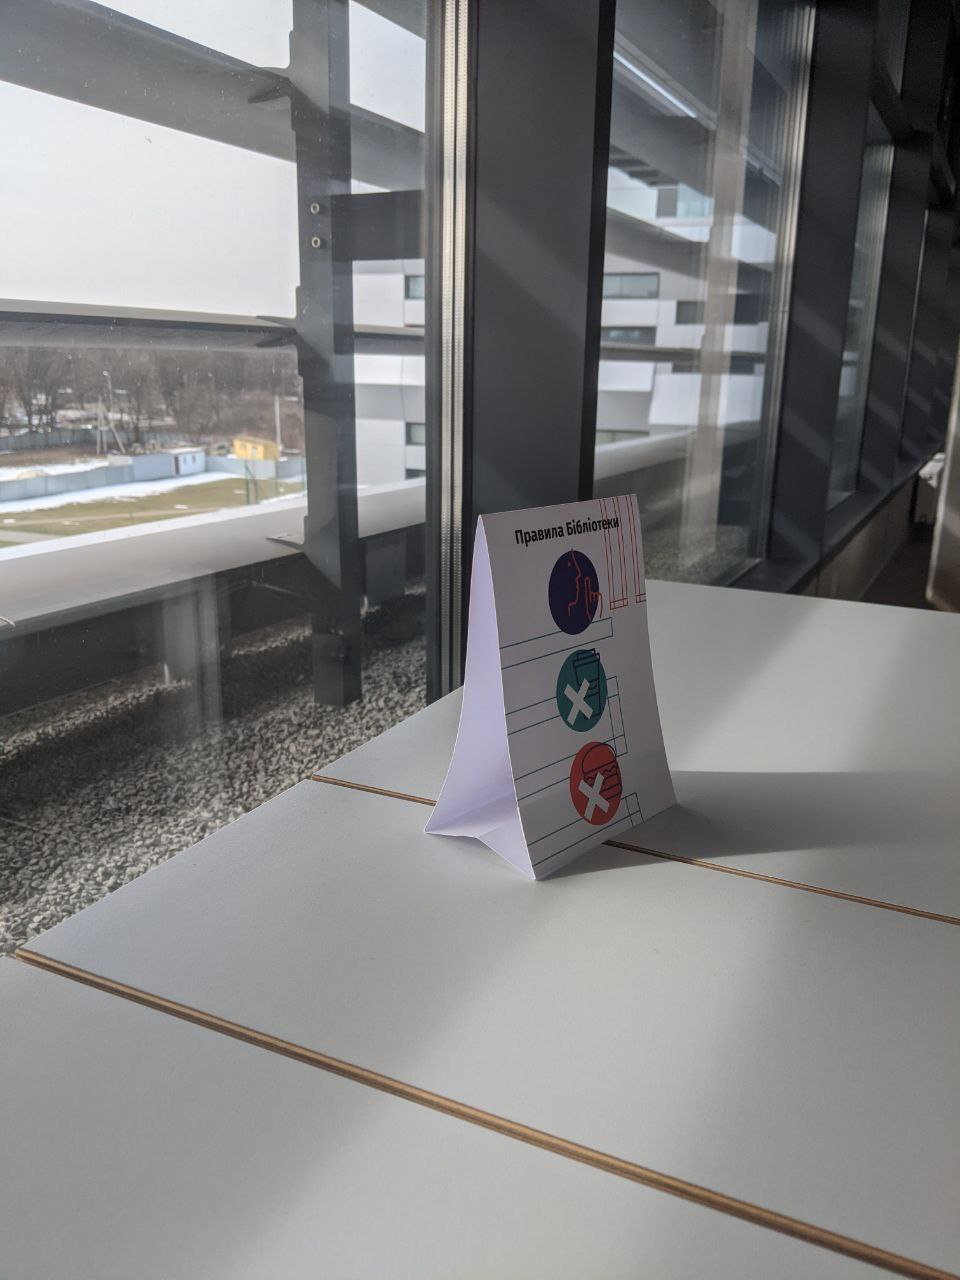

In [ ]:
img2_path = './images/img2.jpg'
image2 = cv.imread(img2_path)

cv2_imshow(image2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

In [ ]:
def get_perspective_transform_matrix(source, dest):
  matrix = np.float32(
      [
        [source[0][0], source[0][1], 1, 0, 0, 0, -source[0][0]*dest[0][0], -source[0][1]*dest[0][0]],
        [source[1][0], source[1][1], 1, 0, 0, 0, -source[1][0]*dest[1][0], -source[1][1]*dest[1][0]],
        [source[2][0], source[2][1], 1, 0, 0, 0, -source[2][0]*dest[2][0], -source[2][1]*dest[2][0]],
        [source[3][0], source[3][1], 1, 0, 0, 0, -source[3][0]*dest[3][0], -source[3][1]*dest[3][0]],
        [0, 0, 0, source[0][0], source[0][1], 1, -source[0][0]*dest[0][1], -source[0][1]*dest[0][1]],
        [0, 0, 0, source[1][0], source[1][1], 1, -source[1][0]*dest[1][1], -source[1][1]*dest[1][1]],
        [0, 0, 0, source[2][0], source[2][1], 1, -source[2][0]*dest[2][1], -source[2][1]*dest[2][1]],
        [0, 0, 0, source[3][0], source[3][1], 1, -source[3][0]*dest[3][1], -source[3][1]*dest[3][1]]
      ]
  )

  rhs = np.atleast_2d(np.float32(
        [dest[0][0], dest[1][0], dest[2][0], dest[3][0], dest[0][1], dest[1][1], dest[2][1], dest[3][1]]
  )).T

  solution = np.linalg.solve(matrix, rhs)
  solution.resize((9,), refcheck=False)
  solution[8] = 1
  solution = solution.reshape((3, 3))

  return solution

In [ ]:
rows,cols,ch = image2.shape

source_points = np.float32(
    [
      [483, 513],
      [630, 495],
      [536, 880],
      [670, 800]
    ] 
  )

destination_points = np.float32(
    [
      [0, 0],
      [450, 0],
      [0, 600],
      [450, 600]
    ] 
  )

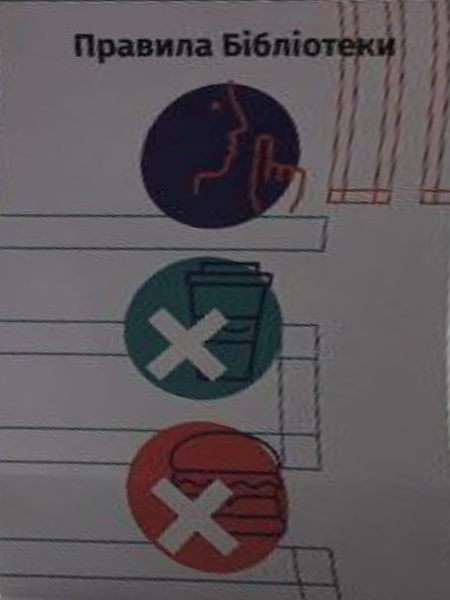

In [ ]:
perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)
transformed = cv.warpPerspective(image2, perspective_shift_m, (450, 600))

cv2_imshow(transformed)

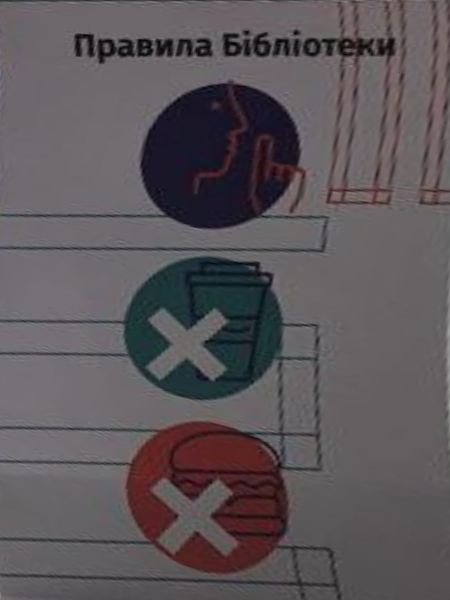

In [ ]:
perspective_shift_m_inbuilt = cv.getPerspectiveTransform(source_points, destination_points)
transformed_inbuilt = cv.warpPerspective(image2, perspective_shift_m_inbuilt, (450, 600))

cv2_imshow(transformed_inbuilt)

As we observe above, the result from our imblemented method and from the inbuilt method of getting the perspective shift matrix coincide. That means that both matrices are the same.

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

In [ ]:
m_scale = get_scaling_matrix(1.5, 2)
m_rotate = get_rotation_matrix(18)
m_translate = get_translation_matrix(10, 15)

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------


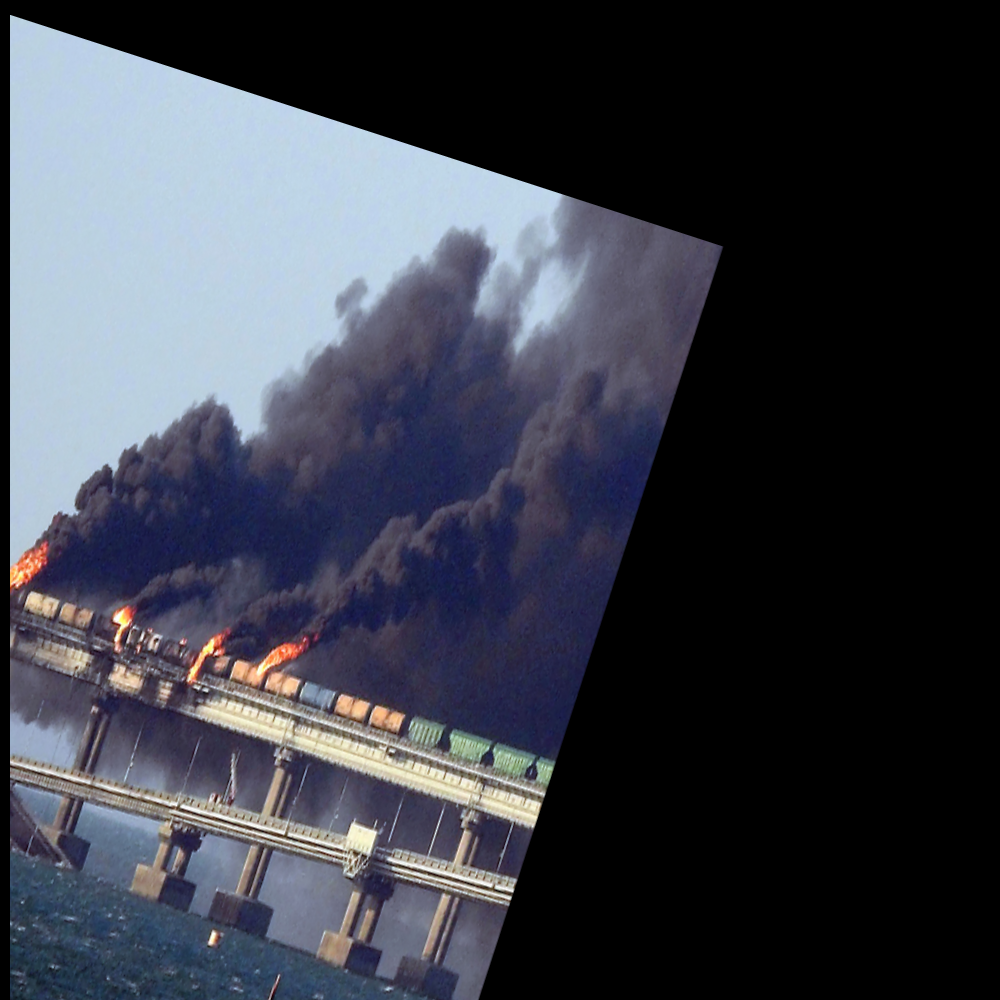

In [ ]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

img_t_1 = cv.warpAffine(resized, np.hstack((m_scale, np.float32([[0], [0]]))), (1000, 1000), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
img_t_1 = cv.warpAffine(img_t_1, np.hstack((m_rotate, np.float32([[0], [0]]))), (1000, 1000), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
img_t_1 = cv.warpAffine(img_t_1, m_translate[:2][:], (1000, 1000), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(img_t_1)

---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


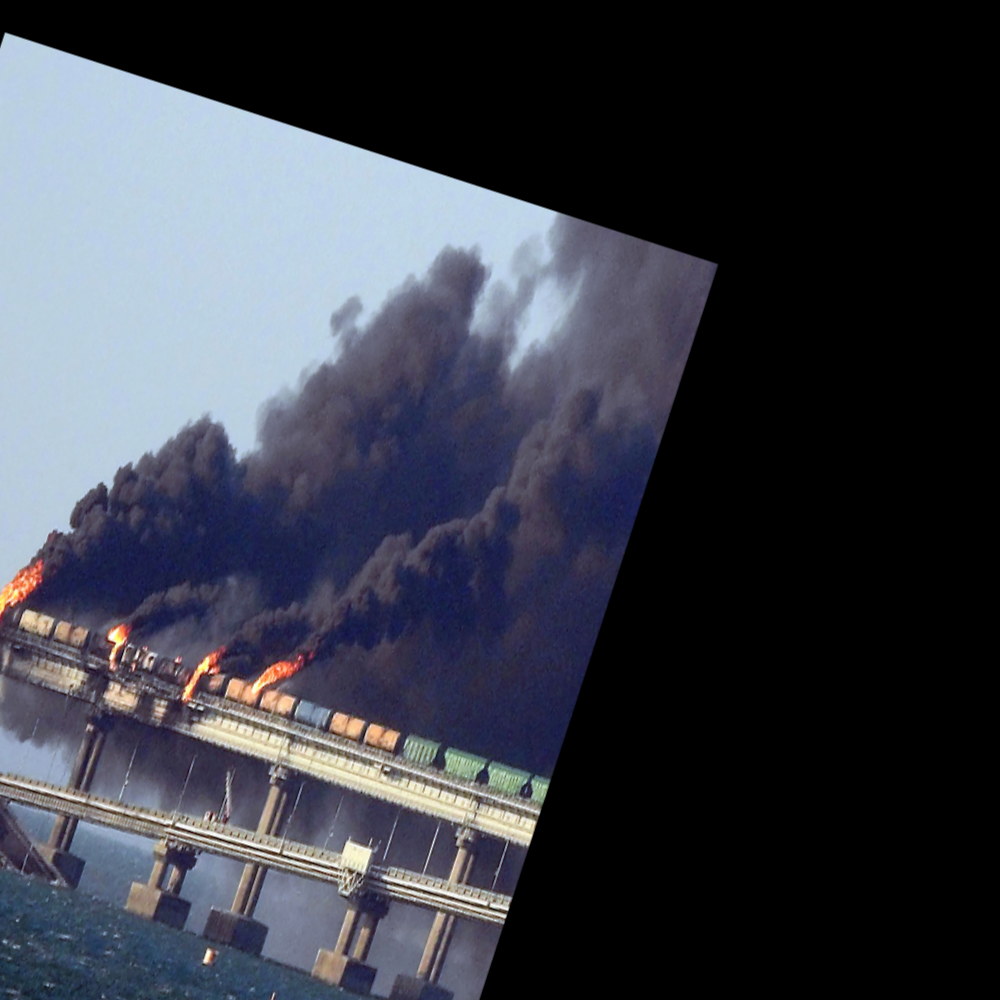

In [ ]:
print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

img_t_2 = cv.warpAffine(resized, np.float32(m_translate[:2][:]), (1000, 1000), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
img_t_2 = cv.warpAffine(img_t_2, np.float32(np.hstack((m_scale, np.float32([[0], [0]])))), (1000, 1000), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
img_t_2 = cv.warpAffine(img_t_2, np.float32(np.hstack((m_rotate, np.float32([[0], [0]])))), (1000, 1000), flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)

cv2_imshow(img_t_2)

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

As we can see, the outputs from the two different orders of same transformations do not coincide. If we take a closer look at the top right corner of the images and compare them, we will see that in the second case, the offset from the top of the actual image is greater than in the first one. Also, there is an offset from the left edge of the actual image in the first case. This is because, in the first case, we first rotated the image, which caused it to crop to the size of the output image, and then shifted (translated) it to the right. Whereas in the second case, we first shifted (translated) it and then rotated.\
However, it is possible to obtain same result, while changing the order of operations, when they do not overlap. More formally, if we denote several transformations by matrices $B_i$, then in order for the outcome to be independent of the order of applying those transformatons, the matrix product of all permutations of order of transformation matrices $B_i$ in the product (the order they are applied in) has to be the same.

### **Summary**

To summarize everything you have learnt in this lab assignment, answer the questions below.

### **What is a transformation matrix?**

*Transformation matrix is matrix which change our  vector from initial to another one  with help of matrix multiplication*

\begin{equation}
T×
 \left( \begin{array}{ccc}
x\\
y\\
\end{array} \right)=\left(\begin{array}{ccc}
x'\\
y'\\
\end{array} \right)\text{where T is the transormation matrix}
\end{equation}

During this lab we practiced different types of matrix transformation:

*   Rotation
*   Scaling
*   Shearing
*   Translating
*   Reflection
*   Perspective shift







### **How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?**

*The shape of transormation matrix is usually 2 × 3, for example, the cv.warpAffine() function only accepts a 2 × 3 matrix. This is because the third column is used for translation. Therefore in cases where translation is not needed, this third column is just zeroes. Also, if we need to make a perspective shift, we need a 3 × 3 matrix.*
*The values affect the resulting image, because they define the positions of the pixels in the resulting image. This is achieved through by matrix vector multiplication, where a vector is a coordinate of the pixel in the initial image. For example, the shape of an image can be changed by scaling and shearing, because matrix values include some factors that change images' shape.*

### **What can be a result of composition of transformations?**

*A composition of transformations is the consecutive 2 or more operations performed on the given vector: the order matters.*

*It can result in changing the shape, postion and orientation. Also some combination of operations can be substituted by another operation. For instance, composition of two reflections across intersecting lines results in the same way as rotation for 180 degrees.Another consequence of composition can be glide reflection(reflection and translation). Essentially, a composition of several transformation is a matrix product of transformation matrices in the order those transformations were applied.*

### **What is a perspective shift transformation in terms of geometry?**



*When we need to project the 3D object how it can be seen in  eye space, we use perspective shift transformation. The perspective transformation describes how a point in three space is mapped to the drawing plane. This can be simply explained using elementary geometry. We begin by setting up coordinates. A projection involves two coordinate systems. A point in the coordinate system of an object to be drawn is given by $X=(x,y,z)$ and the corresponding on the drawing plane is $P=(u,v)$. Here $u = \frac{x}{z}$, $v = \frac{y}{z}$.
So when we perform a perspective shift on an image, we first go back to the 3d representation of the image, change the perspectie (the camera view) and then make a parallel projection on the plane once again. Basically, it's a manipulation with parallel projectoins of 3d space onto the 2d plane. Mathematically, we have that $perspective\_matrix * (source\_x, source\_y, 1)^T = (destination\_x*w, destination\_y*w, w)$, where $w$ is a distance from the point of view to the point in 3d space. Then to project it back on the plane, we divide the outcome vector $(destination\_x*w, destination\_y*w, w)$ by $w$ and take first two values: $(destination\_x, destination\_y)$.*